In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Black–Scholes formula for European Option
import numpy as np
from scipy.stats import norm


def bs_pricing(S0, K, r, sigma, t, T, opt_type='C'):
    """Black–Scholes price for European option and analytical Greeks"""
    ttm = T-t
    
    if ttm < 0:
        return 0.0
    elif ttm == 0.0:
        if opt_type == 'C':
            return np.maximum(S0 - K, 0.0)
        else:
            return np.maximum(K - S0, 0.0)
    
    num = np.log(S0/K) + (r - 0.5 * sigma**2) * ttm
    den = sigma * np.sqrt(ttm)
    d2 = num/den

    d1 = d2 + den

    if opt_type == 'C':
        price = S0 * norm.cdf(d1) - K * np.exp(-r * ttm) * norm.cdf(d2)
        delta = norm.cdf(d1)
        theta = (-(S0 * norm.pdf(d1)) * sigma / 2 * np.sqrt(ttm)) - r * K * np.exp(-r * ttm) * norm.cdf(d2) 
        rho = ttm * K * np.exp(-r * ttm) * norm.cdf(d2)
    else:
        price = K * np.exp(-r * ttm) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
        delta = norm.cdf(d1) - 1
        theta = (-(S0 * norm.pdf(d1)) * sigma / 2 * np.sqrt(ttm)) + r * K * np.exp(-r * ttm) * norm.cdf(-d2) 
        rho = -ttm * K * np.exp(-r * ttm) * norm.cdf(-d2)

    gamma = norm.pdf(d1)/(S0 * den)
    vega = S0 * norm.pdf(d1) * np.sqrt(ttm)
    
    return {
        'time':ttm, 
        'price':price, 
        'delta':delta, 
        'gamma':gamma, 
        'vega':vega, 
        'theta':theta, 
        'rho':rho
    }

# Example parameters
S0, K, r, sigma, t, T = 100, 105, 0, 0.2, 0, 2
call_price = bs_pricing(S0, K, r, sigma, t, T, 'C')['price']
put_price = bs_pricing(S0, K, r, sigma, t, T, 'P')['price']
print(f"Black–Scholes Call Price: {call_price:.2f}")
print(f"Black–Scholes Put Price: {put_price:.2f}")

Black–Scholes Call Price: 9.20
Black–Scholes Put Price: 14.20


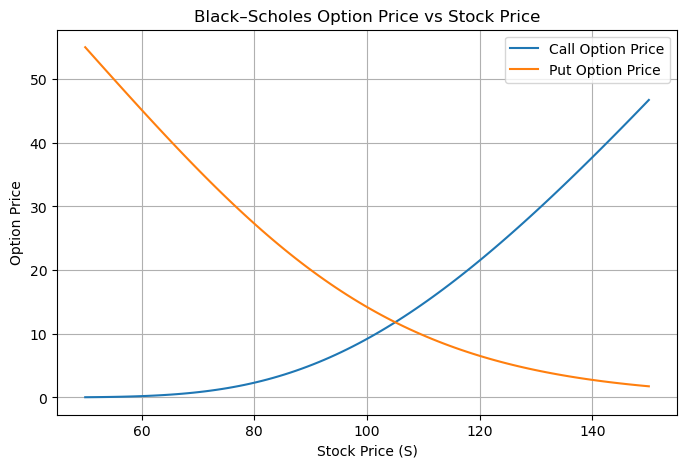

In [3]:
# Plot: Call option price vs Stock price
S_range = np.linspace(50, 150, 100)  # stock price from 50 to 150
call_values = [bs_pricing(s, K, r, sigma, t, T, 'C')['price'] for s in S_range]
put_values = [bs_pricing(s, K, r, sigma, t, T, 'P')['price'] for s in S_range]

plt.figure(figsize=(8,5))
plt.plot(S_range, call_values, label="Call Option Price")
plt.plot(S_range, put_values, label="Put Option Price")
plt.title("Black–Scholes Option Price vs Stock Price")
plt.xlabel("Stock Price (S)")
plt.ylabel("Option Price")
plt.legend()
plt.grid(True)
plt.show()